In [1]:
from scripts.imports import os, glob, pdb, np, h5py, pd, xr, gpd, Proj, Transformer, CRS, \
                        plt, cmap, Model, Data, ODR, datetime, rasterio, show, \
                        ccrs, cfeature
from scripts.classes_fixed import *
from scripts.pvpg_fixed import *
from scripts.track_pairs import *
from scripts.show_tracks import *

%matplotlib ipympl

/home/s1803229/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Outliers in $\rho_v/\rho_g$ Estimation

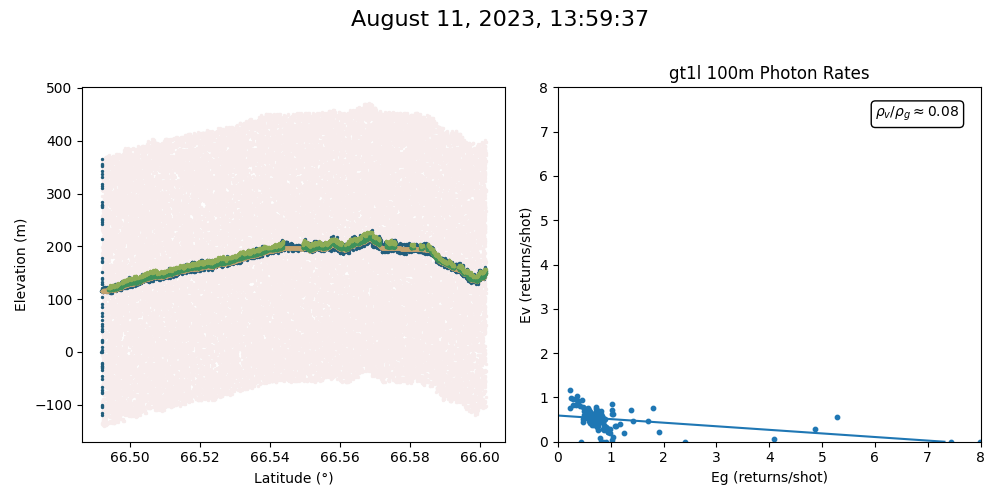

In [2]:
dirpath = '../data/rovaniemi_w/'
all_ATL03, all_ATL08 = track_pairs(dirpath)

N = 45
gt = 'gt1l'
atl03path = all_ATL03[N]
atl08path = all_ATL08[N]

pvpg_gt(atl03path, atl08path, gt)

### Show location of relevant segments on a map

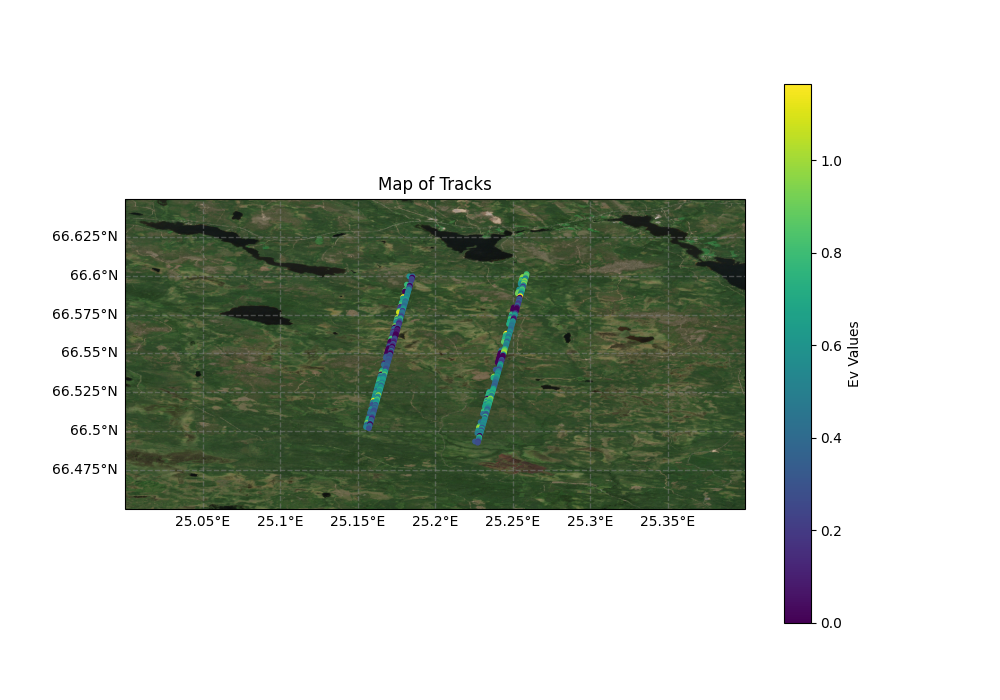

In [5]:
dirpath = '../data/rovaniemi_w/'
all_ATL03, all_ATL08 = track_pairs(dirpath)

# extent = [25.2, 25.4, 66.45, 66.65]
fig, ax = map_setup(map_path = dirpath + '/rovaniemi_image.tiff', extent = (25,25.4,66.45,66.65))

ax = show_tracks(all_ATL03[45], all_ATL08[45], ax, c='Ev')

# Show the plot
plt.show()

Looking at the plot above, bodies of water are clearly problematic. Perhaps it would be better to simply remove high Eg value data points in the end.

### Penalized orthogonal distance regression



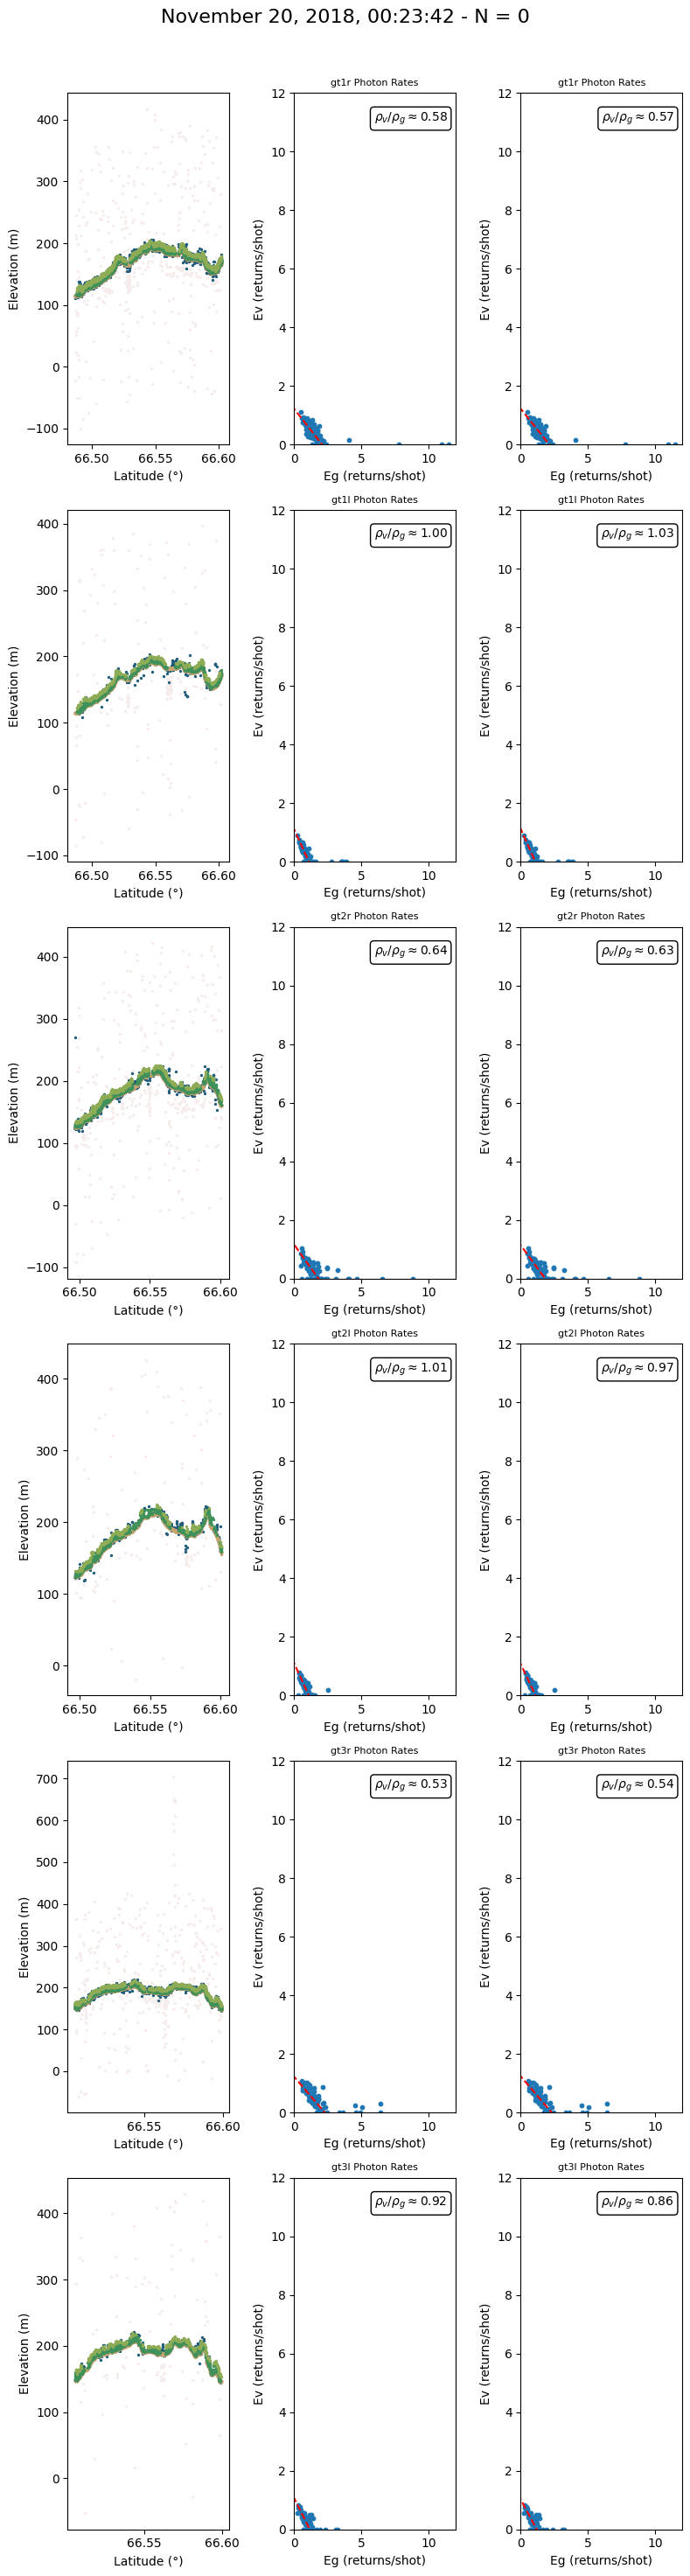

File 1 has been skipped.


In [3]:
# %matplotlib ipympl
%matplotlib inline

dirpath = '../data/rovaniemi_w/'
all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

for j in range(0,2):
    pvpg_penalized_flagged(all_ATL03[j],all_ATL08[j],
                           f_scale=[.1,.2],
                           loss = ['arctan','arctan'],
                           file_index=j)